In [2]:
#import pandas and numpy library
import pandas as pd
import numpy as np

In [12]:
# read the csv file, we can get the information of csv file like age, workclass, 
#education, martal-status, occupaton, sex, capital-gain, capital-loss, and income

adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")
adultDF


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [4]:
# we can know first five rows of the data frame
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [5]:
# Create a new predictor capital-gain-loss 
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

# read first 10 rows of dataframe
new_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


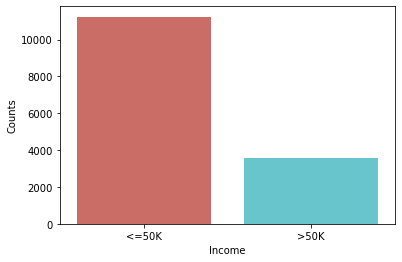

In [6]:
#  Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

In [8]:
# encode the categoric columns from new data frame

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)



,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [10]:
# output for training size and testing size

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 2)
Test size: (2960, 2)


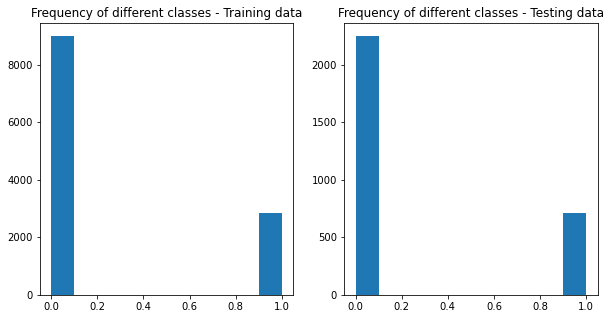

In [11]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

In [76]:

# Create a function to make the decision tree model 

def makeDTModel(criterion, X_train, y_train,max_depth=None,max_leaf_nodes=None):
  DTModel1 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                max_leaf_nodes=max_leaf_nodes,random_state = 120)
  DTModel1.fit(X_train,y_train)
    
  return DTModel1

In [77]:
# create a function to display tree that display text and graphic representation 
# of a tree classifier. plot the tree

cn = ['low_income', 'hi_income']

def displayTree(classifier, X):
    
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn, 
                 
                 filled = True)

In [78]:
# display text and heatmap of a confusion matrix

def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true = y_test, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier")

In [79]:
# create the function to compare the models and display plots 
# Record cart's classification accuracy on tarining and test datasets


def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  
  cartTraining_score1 = round(cart_classifier.score(X_train, y_train), 2) 
  cartTesting_score1 = round(cart_classifier.score(X_test, y_test), 2)   

  print ("CART Training and Testing scores: %.2f, %.2f" %  (cartTraining_score1, cartTesting_score1))

  c5Training_score1 = round(c5_classifier1.score(X_train, y_train), 2) 
  c5Testing_score1 = round(c5_classifier1.score(X_test, y_test), 2)  

  print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (c5Training_score1, c5Testing_score1))


  training_scores = [cartTraining_score1, c5Training_score1]
  testing_scores =  [cartTesting_score1, c5Testing_score1]

#  the label locations
  x = np.arange(2) 
    
# the width of the bars
  width = 0.35  

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='black')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='red')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

In [80]:
# testing max_depth=2 and max_leaf_nodes=3
cart_classifier1 = makeDTModel("gini", X_train, y_train,2,3)
c5_classifier1 = makeDTModel("entropy", X_train, y_train,2,3)

# testing max_depth=3 and max_leaf_nodes=4
cart_classifier2 = makeDTModel("gini", X_train, y_train,3,4)
c5_classifier2 = makeDTModel("entropy", X_train, y_train,3,4)

# testing max_depth=4 and max_leaf_nodes=5
cart_classifier3 = makeDTModel("gini", X_train, y_train,4,5)
c5_classifier3 = makeDTModel("entropy", X_train, y_train,4,5)

# testing max_depth=None and max_leaf_nodes=None
cart_classifier4 = makeDTModel("gini", X_train, y_train)
c5_classifier4 = makeDTModel("entropy", X_train, y_train)

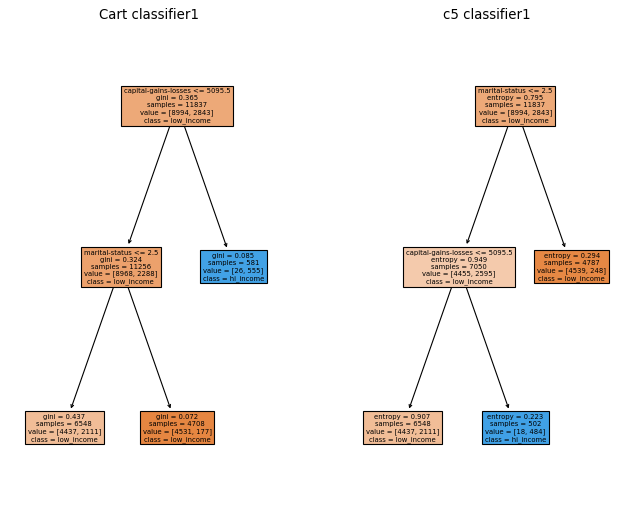

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Display the tree for cart classifier1

plt.figure(figsize=(10,8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier1, X)
plt.title("Cart classifier1")

# Display the tree for c5 classifier1
plt.subplot(1,2,2)
displayTree(c5_classifier1, X)
plt.title("c5 classifier1")
plt.show()

[[2238   11]
 [ 583  128]]
---------
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier1')

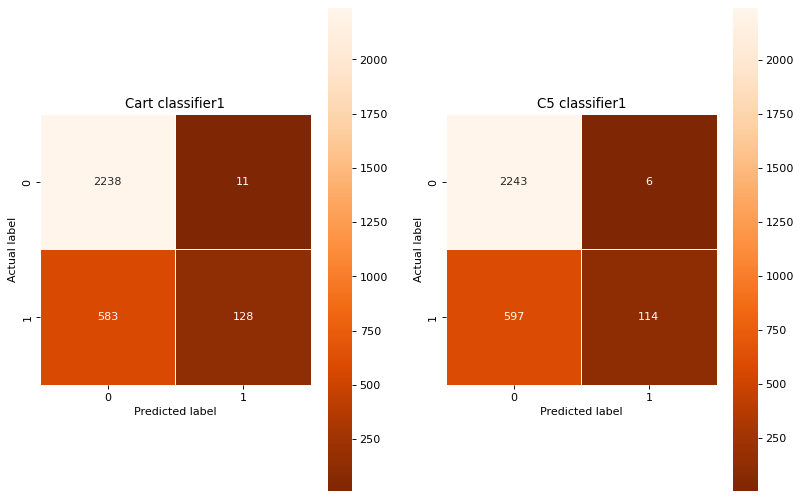

In [82]:
# Display Confusion matrix for cart_classifier1

from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(12, 8), dpi=80)


plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier1, X_train, y_train, X_test, y_test)
plt.title("Cart classifier1")

print("---------")

# Display  Confusion matrix for c5 classifier1

plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier1, X_train, y_train, X_test, y_test)
plt.title("C5 classifier1")

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


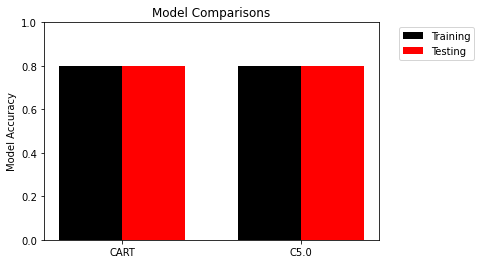

In [83]:
# max_depth 2 and max_leaf_node 3 is 80% for the cart and 80% for the c5 model.
compareModels(cart_classifier1, c5_classifier1)

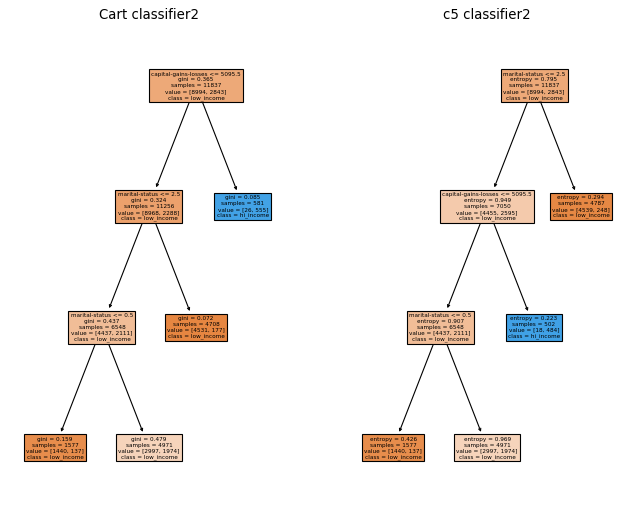

In [84]:
# Display the tree for cart classifier2

plt.figure(figsize=(10,8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier2, X)
plt.title("Cart classifier2")

# Display the tree for c5 classifier1
plt.subplot(1,2,2)
displayTree(c5_classifier2, X)
plt.title("c5 classifier2")
plt.show()

[[2238   11]
 [ 583  128]]
---------
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier2')

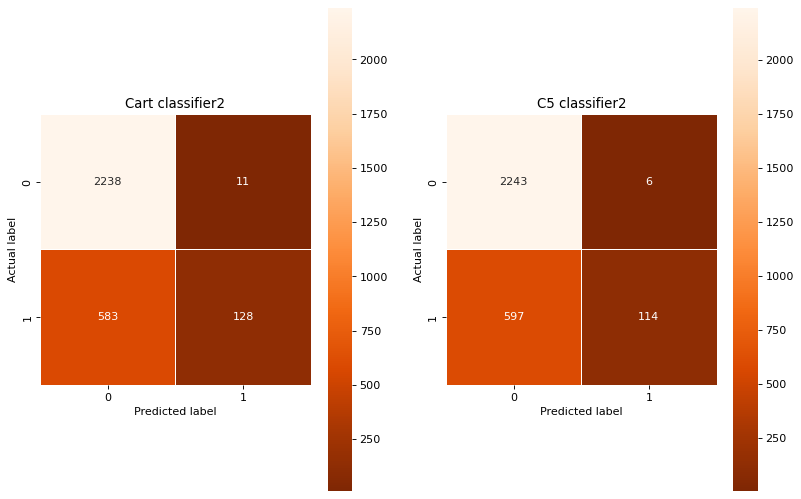

In [85]:
# Display Confusion matrix for cart_classifier2

plt.figure(figsize=(12, 8), dpi=80)


plt.subplot(1,2,1)
cart_cm2 = displayCM(cart_classifier2, X_train, y_train, X_test, y_test)
plt.title("Cart classifier2")

print("---------")

# Display  Confusion matrix for c5 classifier2

plt.subplot(1,2,2)
c5_cm2 = displayCM(c5_classifier2, X_train, y_train, X_test, y_test)
plt.title("C5 classifier2")

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


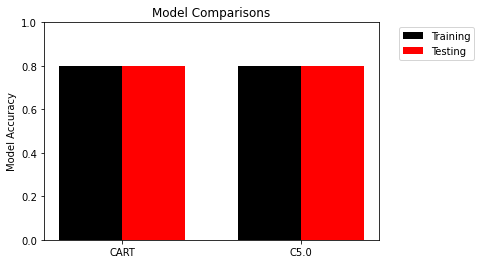

In [86]:
# max_depth 3 and max_leaf_node 4 is 80% for the cart and 80% for the c5 model.
compareModels(cart_classifier2, c5_classifier2)

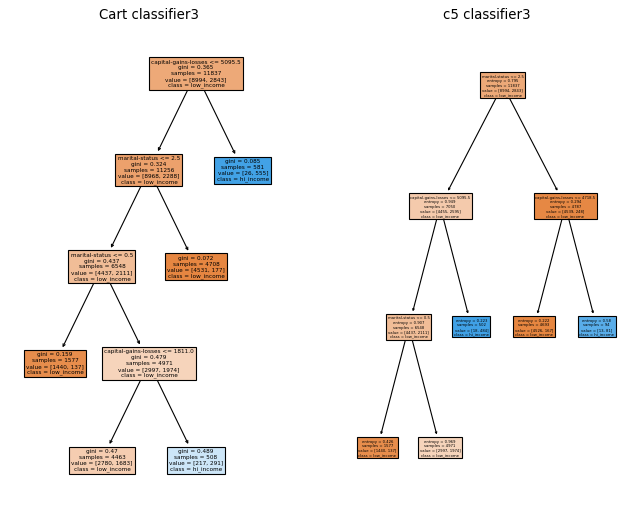

In [87]:
# Display the tree for cart classifier3

plt.figure(figsize=(10,8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier3, X)
plt.title("Cart classifier3")

# Display the tree for c5 classifier1
plt.subplot(1,2,2)
displayTree(c5_classifier3, X)
plt.title("c5 classifier3")
plt.show()

[[2187   62]
 [ 511  200]]
---------
[[2235   14]
 [ 583  128]]


Text(0.5, 1.0, 'C5 classifier3')

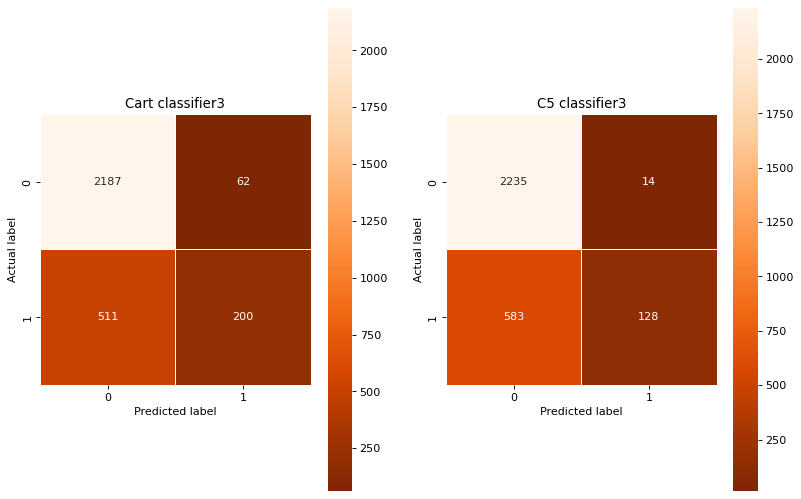

In [93]:
# Display Confusion matrix for cart_classifier3

plt.figure(figsize=(12, 8), dpi=80)


plt.subplot(1,2,1)
cart_cm3 = displayCM(cart_classifier3, X_train, y_train, X_test, y_test)
plt.title("Cart classifier3")

print("---------")

# Display  Confusion matrix for c5 classifier3

plt.subplot(1,2,2)
c5_cm3 = displayCM(c5_classifier3, X_train, y_train, X_test, y_test)
plt.title("C5 classifier3")

CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


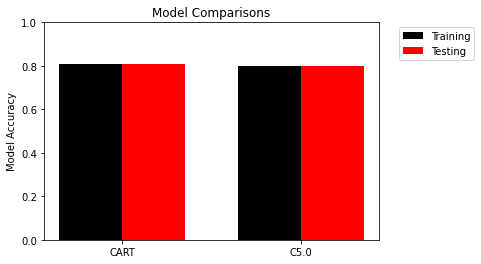

In [95]:
# max_depth 4 and max_leaf_node 5 is 81% for the cart and 80% for the c5 model.

compareModels(cart_classifier3, c5_classifier3)

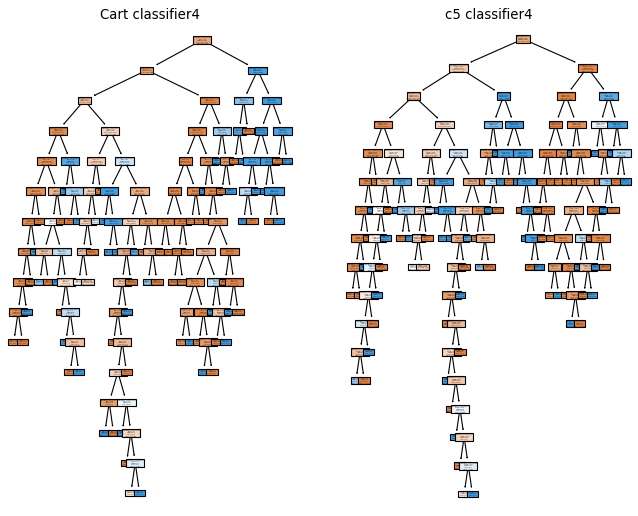

In [96]:
# Display the tree for cart classifier4

plt.figure(figsize=(10,8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier4, X)
plt.title("Cart classifier4")

# Display the tree for c5 classifier4

plt.subplot(1,2,2)
displayTree(c5_classifier4, X)
plt.title("c5 classifier4")
plt.show()

[[2238   11]
 [ 502  209]]
---------
[[2237   12]
 [ 502  209]]


Text(0.5, 1.0, 'C5 classifier4')

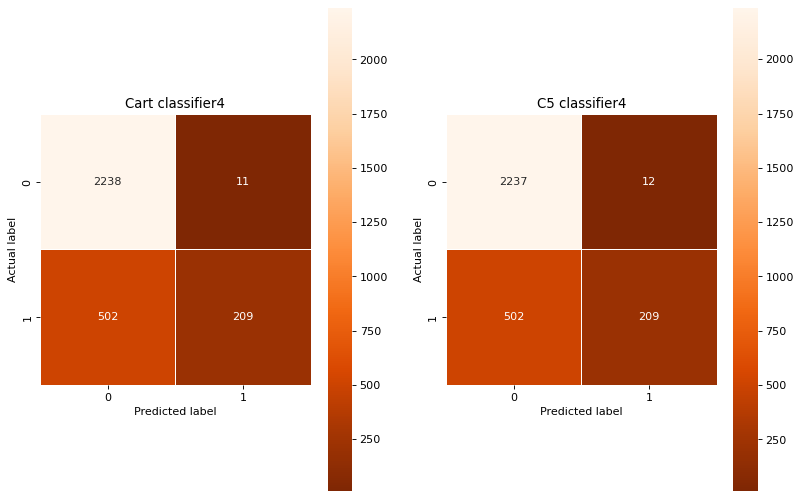

In [97]:
# Display Confusion matrix for cart_classifier4

plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(1,2,1)
cart_cm4 = displayCM(cart_classifier4, X_train, y_train, X_test, y_test)
plt.title("Cart classifier4")

print("---------")

# Display  Confusion matrix for c5 classifier4

plt.subplot(1,2,2)
c5_cm4 = displayCM(c5_classifier4, X_train, y_train, X_test, y_test)
plt.title("C5 classifier4")

CART Training and Testing scores: 0.83, 0.83
C5.0 Training and Testing scores: 0.80, 0.80


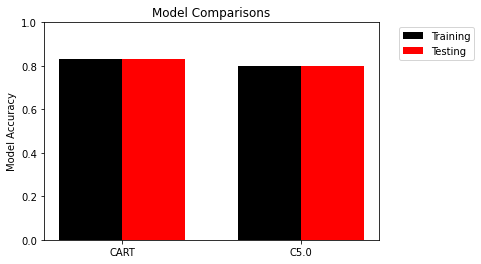

In [98]:
# none of max depth and max leaf node is 83% with the cart model and 80% with the c5 model.

compareModels(cart_classifier4, c5_classifier4)

In [ ]:
# summary: based on the data i find When we effect of the parameters max_depth and 
# max_leaf_nodes on classification accuracy like increasing the parameters 
# the accuracy  of cart classifier and c5 classifier will be different. 
# Furthermore, the accuracy of cart classifier is higher than that of c5 classifier.